# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [22]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

Podpunkt a)

In [23]:
m = 10
A1 = main.random_matrix_Ab(m)[0]
b1 = main.random_matrix_Ab(m)[1]

Podpunkt b)

In [24]:
A2 = main.diag_dominant_matrix_A_b(m)[0]
b2 = main.diag_dominant_matrix_A_b(m)[1]

Podpunkt c)

In [25]:
A3 = main.symmetric_matrix_A_b(m)[0]
b3 = main.symmetric_matrix_A_b(m)[1]

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [26]:
if A1.shape[0] == A1.shape[1]:
    x1 = np.linalg.solve(A1, b1)
    error = np.linalg.norm(b1 - A1 @ x1)
    print(error)
else:
    print('warunki dotyczące macierzy dla danej metody nie są spełnione')

2.761644904721361e-16


In [27]:
if main.is_diag_dominant(A1):
    x_init = np.zeros((m, 1))
    tab_iter = [1,5,10,20,50,100,200,500]
    tab_error = []
    for i in range(len(tab_iter)):
        x, maxiter =  main.solve_jacobi(A1, b1, x_init, maxiter=tab_iter[i], epsilon=2.2e-16)
        tab_error.append(np.linalg.norm(b1 - A1 @ x))
    
    plt.scatter(tab_iter, tab_error)
    plt.yscale('log')
    plt.xlabel("ilość iteracji")
    plt.ylabel("wartość normy residdum")
    
    plt.show()
else:
     print('warunki dotyczące macierzy dla danej metody nie są spełnione')

warunki dotyczące macierzy dla danej metody nie są spełnione


In [28]:
if main.is_symmetric(A1) and np.all(np.linalg.eigvals(A1) > 0):
    x_init = np.zeros((m, 1))
    tab_iter = [1,5,10,20,50,100,200,500]
    tab_error = []
    for i in range(len(tab_iter)):
        x, maxiter =  sp.sparse.linalg.cg(A1, b1, x_init,maxiter=tab_iter[i])
        tab_error.append(np.linalg.norm(b1 - A1 @ x))
    plt.scatter(tab_iter, tab_error)
    plt.yscale('log')
    plt.xlabel("ilość iteracji")
    plt.ylabel("wartość normy residdum")
    
    plt.show()
else:
    print('warunki dotyczące macierzy dla danej metody nie są spełnione')

warunki dotyczące macierzy dla danej metody nie są spełnione


0


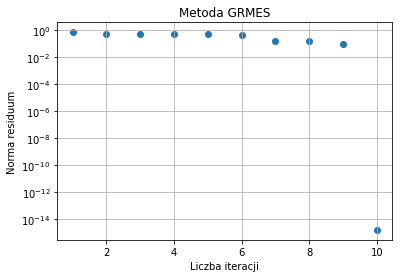

In [29]:
error = []
def callback_1(xk):
    error.append(xk)

result, info = sp.sparse.linalg.gmres(A1, b1, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')

print(info)
lght = len(error)
x = [i + 1 for i in range(lght)]
plt.scatter(x, error)
plt.yscale('log')
plt.grid()
plt.title("Metoda GRMES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Norma residuum")
plt.show()

Analizy czasowe

1.43 ms ± 165 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.15 ms ± 353 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
841 µs ± 183 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
752 µs ± 53 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
713 µs ± 29.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
848 µs ± 89 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
914 µs ± 125 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
842 µs ± 97.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


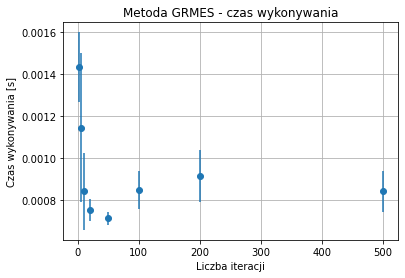

In [36]:
time = []
err = []
size = [1,5,10,20,50,100,200,500]
for i in size:
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter=i, atol=2.2e-16)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

x = [i for i in size]
plt.errorbar(x, time, yerr=err, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda GRMES - czas wykonywania")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")

plt.show()

Macierz z punktu a) spełniała warunki tylko dla metody iteracyjnej - algorytmu GMRES. Dla liczby itreacji [0,9] błąd utrzymywał się na poziomie rzędu 0 i -1. Dopiero przy 10 iteracji sięgnął rzędu 10^-15

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [32]:
if A2.shape[0] == A2.shape[1]:
    x1 = np.linalg.solve(A2, b2)
    error = np.linalg.norm(b2 - A2 @ x1)
    print(error)
else:
    print('warunki dotyczące macierzy dla danej metody nie są spełnione')

1.4228624520802642e-15


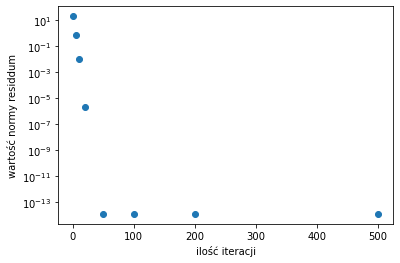

In [33]:
if main.is_diag_dominant(A2):
    x_init = np.zeros((m, 1))
    tab_iter = [1,5,10,20,50,100,200,500]
    tab_error = []
    for i in range(len(tab_iter)):
        x, maxiter =  main.solve_jacobi(A2, b2, x_init, maxiter=tab_iter[i], epsilon=2.2e-16)
        tab_error.append(np.linalg.norm(b2 - A2 @ x))
    
    plt.scatter(tab_iter, tab_error)
    plt.yscale('log')
    plt.xlabel("ilość iteracji")
    plt.ylabel("wartość normy residdum")
    
    plt.show()
else:
     print('warunki dotyczące macierzy dla danej metody nie są spełnione')

In [34]:
if main.is_symmetric(A2) and np.all(np.linalg.eigvals(A2) > 0):
    x_init = np.zeros((m, 1))
    tab_iter = [1,5,10,20,50,100,200,500]
    tab_error = []
    for i in range(len(tab_iter)):
        x, maxiter =  sp.sparse.linalg.cg(A2, b2, x_init,maxiter=tab_iter[i])
        tab_error.append(np.linalg.norm(b2 - A2 @ x))
    plt.scatter(tab_iter, tab_error)
    plt.yscale('log')
    plt.xlabel("ilość iteracji")
    plt.ylabel("wartość normy residdum")
    
    plt.show()
else:
    print('warunki dotyczące macierzy dla danej metody nie są spełnione')

warunki dotyczące macierzy dla danej metody nie są spełnione


0


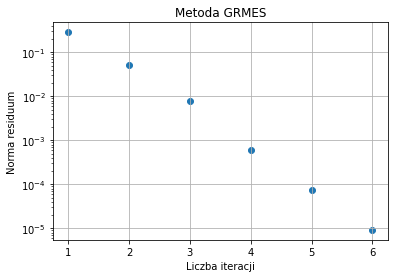

In [14]:
error = []
def callback_1(xk):
    error.append(xk)

result, info = sp.sparse.linalg.gmres(A2, b2, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')

print(info)
lght = len(error)
x = [i + 1 for i in range(lght)]
plt.scatter(x, error)
plt.yscale('log')
plt.grid()
plt.title("Metoda GRMES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Norma residuum")
plt.show()

Analizy czasowe

213 µs ± 49.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
586 µs ± 72.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.28 ms ± 111 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.28 ms ± 153 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.96 ms ± 110 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.74 ms ± 1.41 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.28 ms ± 970 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.41 ms ± 610 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


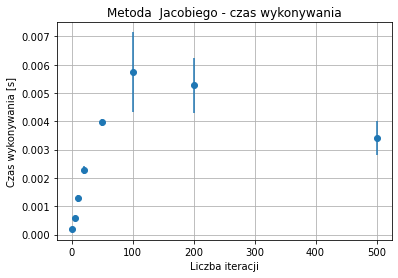

In [15]:
time = []
err = []
size = [1,5,10,20,50,100,200,500]
x_init = np.zeros((m, 1))
for i in size:
    avg_time = %timeit -r 5 -n 10 -o main.solve_jacobi(A2, b2,x_init, maxiter=i, epsilon=2.2e-16)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

plt.errorbar(size, time, yerr=err, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda  Jacobiego - czas wykonywania")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")

plt.show()

922 µs ± 193 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
753 µs ± 52.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
762 µs ± 55 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
928 µs ± 152 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.35 ms ± 195 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.24 ms ± 158 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
918 µs ± 135 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
955 µs ± 122 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


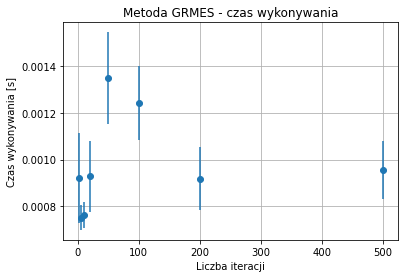

In [16]:
time = []
err = []
size = [1,5,10,20,50,100,200,500]
for i in size:
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter=i, atol=2.2e-16)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

x = [i for i in size]
plt.errorbar(x, time, yerr=err, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda GRMES - czas wykonywania")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")

plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [17]:
if A3.shape[0] == A3.shape[1]:
    x1 = np.linalg.solve(A3, b3)
    error = np.linalg.norm(b3 - A3 @ x1)
    print(error)
else:
    print('warunki dotyczące macierzy dla danej metody nie są spełnione')

8.926082647349967e-15


In [18]:
if main.is_diag_dominant(A3):
    x_init = np.zeros((m, 1))
    tab_iter = [1,5,10,20,50,100,200,500]
    tab_error = []
    for i in range(len(tab_iter)):
        x, maxiter =  main.solve_jacobi(A3, b3, x_init, maxiter=tab_iter[i], epsilon=2.2e-16)
        tab_error.append(np.linalg.norm(b3 - A3 @ x))
    
    plt.scatter(tab_iter, tab_error)
    plt.yscale('log')
    plt.xlabel("ilość iteracji")
    plt.ylabel("wartość normy residdum")
    
    plt.show()
else:
     print('warunki dotyczące macierzy dla danej metody nie są spełnione')

warunki dotyczące macierzy dla danej metody nie są spełnione


In [19]:
if main.is_symmetric(A3) and np.all(np.linalg.eigvals(A3) > 0):
    x_init = np.zeros((m, 1))
    tab_iter = [1,5,10,20,50,100,200,500]
    tab_error = []
    for i in range(len(tab_iter)):
        x, maxiter =  sp.sparse.linalg.cg(A3, b3, x_init,maxiter=tab_iter[i])
        tab_error.append(np.linalg.norm(b3 - A3 @ x))
    plt.scatter(tab_iter, tab_error)
    plt.yscale('log')
    plt.xlabel("ilość iteracji")
    plt.ylabel("wartość normy residdum")
    
    plt.show()
else:
    print('warunki dotyczące macierzy dla danej metody nie są spełnione')

warunki dotyczące macierzy dla danej metody nie są spełnione


0


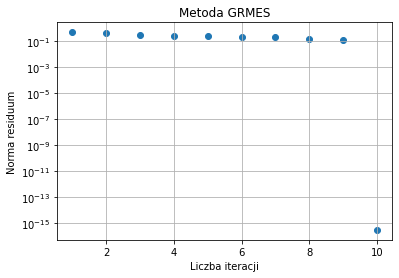

In [20]:
error = []
def callback_1(xk):
    error.append(xk)

result, info = sp.sparse.linalg.gmres(A3, b3, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')

print(info)
lght = len(error)
x = [i + 1 for i in range(lght)]
plt.scatter(x, error)
plt.yscale('log')
plt.grid()
plt.title("Metoda GRMES")
plt.xlabel("Liczba iteracji")
plt.ylabel("Norma residuum")
plt.show()

Dla liczby itreacji [0,9] błąd utrzymywał się na poziomie rzędu 0 i -1. Dopiero przy 10 iteracji sięgnął rzędu powyżej 10^-15

Analizy czasowe

899 µs ± 249 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
823 µs ± 67 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
769 µs ± 41.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
747 µs ± 47.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
792 µs ± 57.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
712 µs ± 32.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
748 µs ± 70.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
733 µs ± 45.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


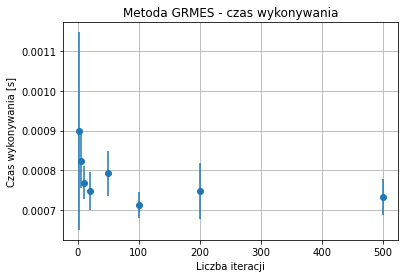

In [21]:
time = []
err = []
size = [1,5,10,20,50,100,200,500]
for i in size:
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter=i, atol=2.2e-16)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

x = [i for i in size]
plt.errorbar(x, time, yerr=err, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda GRMES - czas wykonywania")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonywania [s]")

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)